<a href="https://www.kaggle.com/code/pathompongmuangthong/the-top-10-of-netflix-shows-and-data-visualization?scriptVersionId=114337766" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import re

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


# The Top 10 of Netflix Shows/Movies!
![oscar in leonardo dicaprio](https://media.tenor.com/JGjvADIcSyIAAAAC/oscar-win.gif)

# Load Dataset and Quick Lookup =))
* 8807 Shows data

In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Preprocessing

## Create groupby genre table

In [5]:
dfGenre = df[['show_id', 'listed_in']]
dfGenre['listed_in'] = df['listed_in'].apply(lambda x: x.split(', '))

In [6]:
id_list, genre_list = [], []
for index in dfGenre.index:
    id = dfGenre.at[index, 'show_id']
    genres = dfGenre.at[index, 'listed_in']
    for genre in genres:
        id_list.append(id)
        genre_list.append(genre)
        
dfGenre = pd.DataFrame()
dfGenre = dfGenre.assign(id=id_list, genre=genre_list)

In [7]:
dfGenre.head()

,id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


## Create groupby caster table

In [8]:
dfCast = df[['show_id', 'cast']].loc[df['cast'].notna()]
dfCast['cast'] = dfCast['cast'].apply(lambda x: x.split(', '))

In [9]:
id_list, cast_list = [], []
for index in dfCast.index:
    id = dfCast.at[index, 'show_id']
    casts = dfCast.at[index, 'cast']
    for cast in casts:
        id_list.append(id)
        cast_list.append(cast)
        
dfCast = pd.DataFrame()
dfCast = dfCast.assign(id=id_list, cast=cast_list)

In [10]:
dfCast.head()

,id,cast
0,s2,Ama Qamata
1,s2,Khosi Ngema
2,s2,Gail Mabalane
3,s2,Thabang Molaba
4,s2,Dillon Windvogel


In [11]:
dfCast['cast'].nunique()

36439

# Top 10 Genres in Netflix Shows/Movies
* 22% International Movies
* 19% Dramas
* 13% Comedies
* 11% International TV Shows

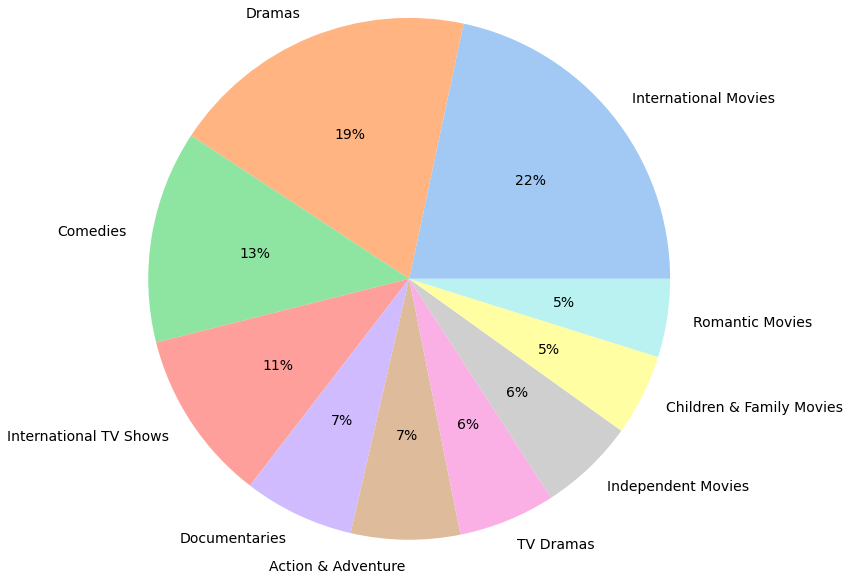

In [12]:
dfPlot = dfGenre.groupby('genre').size().reset_index(name='size').sort_values(by='size', ascending=False).head(10)
colors = sb.color_palette('pastel')[0:len(dfPlot)]
plt.pie(dfPlot['size'], labels=dfPlot['genre'], colors=colors, autopct='%.0f%%', radius=3, textprops={'fontsize': 14})
plt.show()

# Top 10 Acters with The Most Involved in the Shows/Movies
1. Anupam Kher
1. Shah Rukh Khan
1. Jilie Tejwani
1. Naseeruddin Shah
1. Takahiro Sakurai

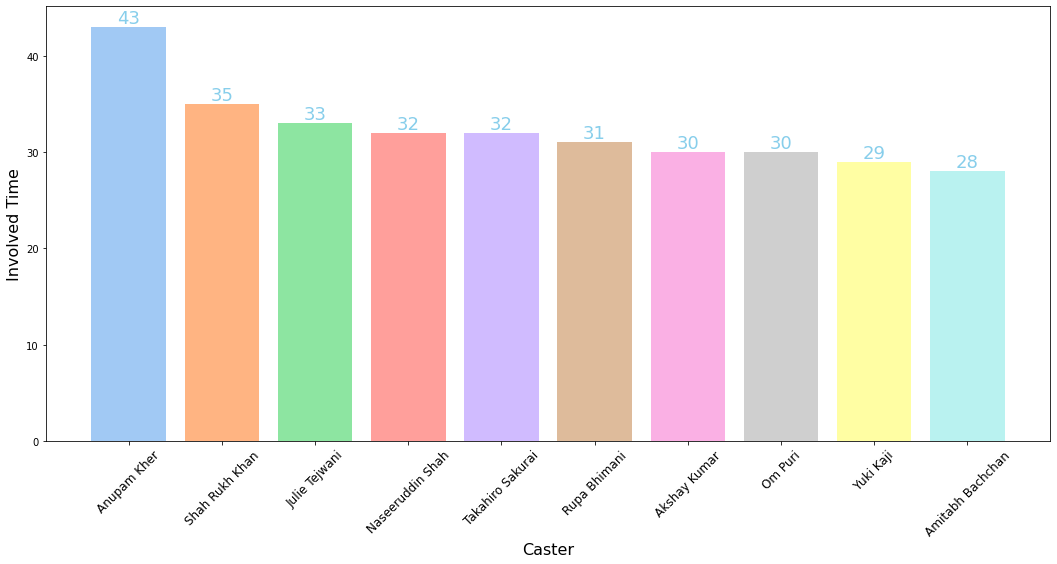

In [13]:
# plot bar chart
dfPlot = dfCast.groupby('cast').size().reset_index(name='size').sort_values(by='size', ascending=False).head(10)

colors = sb.color_palette('pastel')[0:len(dfPlot)]
plt.figure(figsize=(18, 8))

plt.bar(dfPlot['cast'], dfPlot['size'], color=colors, width=0.8)
plt.xlabel('Caster',  fontsize=16)
plt.ylabel('Involved Time',  fontsize=16)

for i,j in zip(dfPlot['cast'],dfPlot['size']):
    plt.annotate(str(j), xy=(i,j), fontsize=18, color='skyblue', ha='center', va='bottom')

plt.xticks(rotation=45, fontsize=12)
plt.show()

# Top 10 Directors Who Directed The Most Shows/Movies
1. Rajiv Chilaka
1. Raúl Campos, Jan Suter
1. Suhas Kadav
1. Marcus Raboy
1. Jay Karas

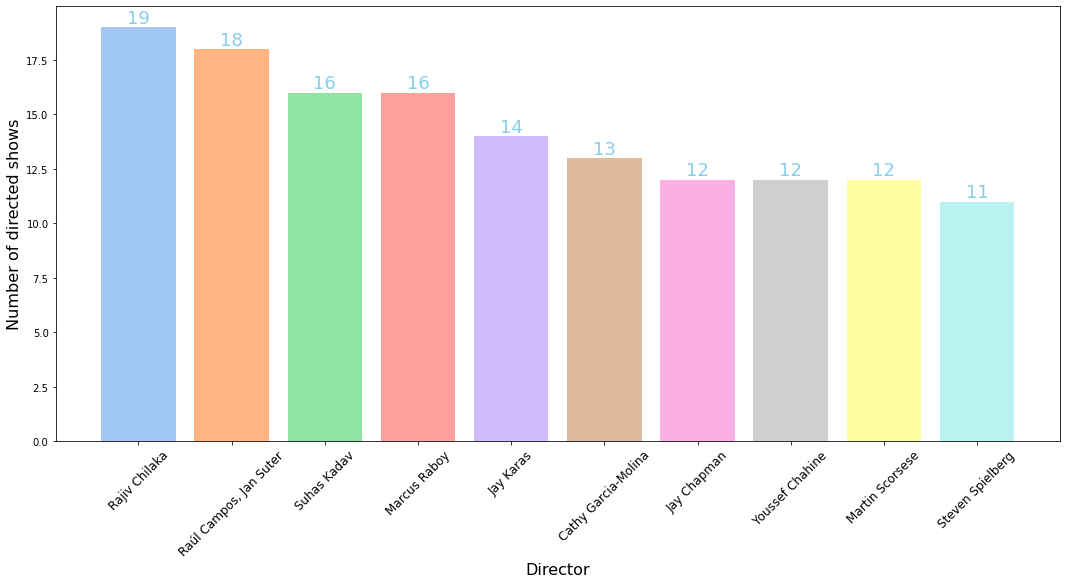

In [14]:
# plot bar chart
dfPlot = df.groupby('director').size().reset_index(name='size').sort_values(by='size', ascending=False).head(10)

colors = sb.color_palette('pastel')[0:len(dfPlot)]
plt.figure(figsize=(18, 8))

plt.bar(dfPlot['director'], dfPlot['size'], color=colors, width=0.8)
plt.xlabel('Director',  fontsize=16)
plt.ylabel('Number of directed shows',  fontsize=16)

for i,j in zip(dfPlot['director'],dfPlot['size']):
    plt.annotate(str(j), xy=(i,j), fontsize=18, color='skyblue', ha='center', va='bottom')

plt.xticks(rotation=45, fontsize=12)
plt.show()

# Number of Released Shows from 2000-2021
* 2018 was the year for the most movieห released

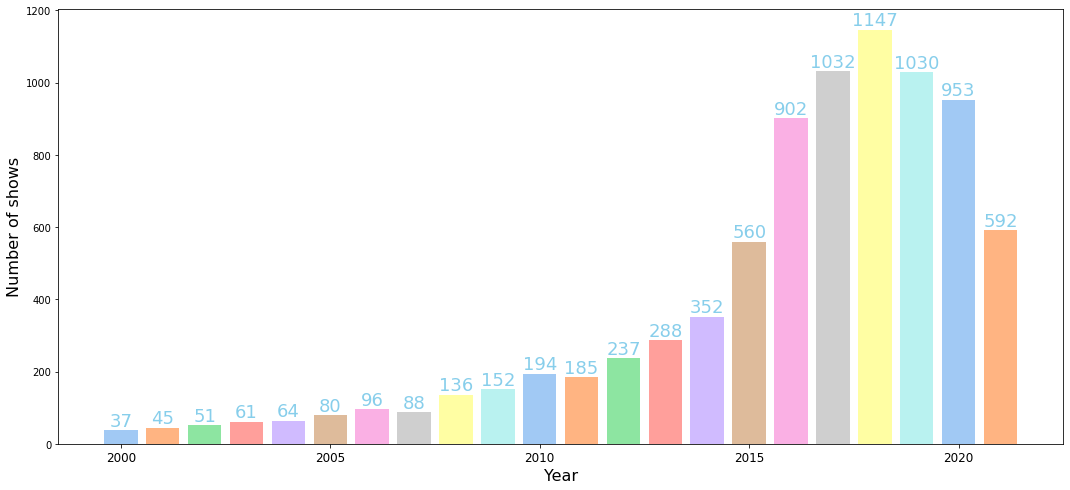

In [15]:
# plot bar chart
dfPlot = df.groupby('release_year').size().reset_index(name='size')
dfPlot = dfPlot.loc[dfPlot['release_year'] >= 2000]

colors = sb.color_palette('pastel')[0:len(dfPlot)]
plt.figure(figsize=(18, 8))

plt.bar(dfPlot['release_year'], dfPlot['size'], color=colors, width=0.8)
plt.xlabel('Year',  fontsize=16)
plt.ylabel('Number of shows',  fontsize=16)

for i,j in zip(dfPlot['release_year'],dfPlot['size']):
    plt.annotate(str(j), xy=(i,j), fontsize=18, color='skyblue', ha='center', va='bottom')

plt.xticks(rotation=0, fontsize=12)
plt.show()

In [16]:
# Happy Holiday! ;ppp

<img src="https://i.pinimg.com/originals/ff/6e/bd/ff6ebd0dfb50a44c04c842f365df4446.gif" width="600">